**Names:** Brett Nesfeder, MacAlistair Husted, Priyanka Choudhary, Shruti Kapur, Jocelyne Walker

**8:30-10:30 am section**


**Assignment 3** 

Is a Picture Worth a Thousand Words?

**reminder** also need to submit all data files

**Scraper** to extract (i) image URLs, (ii) post caption, (iii) # likes and (iv) # comments for around 500 image posts.


In [ ]:
#! pip install instaloader
target_profile = 'zara'

import instaloader
import pandas as pd

def get_profile_posts(username, count):
    L = instaloader.Instaloader( 
		download_pictures=True,
		download_videos=False, 
		download_video_thumbnails=False,
		compress_json=False, 
		download_geotags=False, 
		post_metadata_txt_pattern=None, 
		max_connection_attempts=0,
		download_comments=False,
		)
    profile = instaloader.Profile.from_username(L.context, username)
    owner_username_list = []
    owner_id_list = []
    post_date_list = []
    post_caption_list = []
    caption_mentions_list = [] 
    is_video_list = [] 
    video_view_count_list = [] 
    video_duration_list = [] 
    likes_list = [] 
    comments_list = [] 
    post_date_list = [] 
    post_url_list = [] 
    hashtags_caption_list = []
    i = 0
    for post in profile.get_posts():
        owner_username_list.append(post.owner_username)
        owner_id_list.append(post.owner_id) 
        post_date_list.append(post.date_utc) 
        post_caption_list.append(post.caption) 
        caption_mentions_list.append(post.caption_mentions) 
        is_video_list.append(post.is_video) 
        video_view_count_list.append(post.video_view_count) 
        video_duration_list.append(post.video_duration) 
        likes_list.append(post.likes) 
        comments_list.append(post.comments) 
        post_url_list.append(post.shortcode) 
        hashtags_caption_list.append(post.caption_hashtags)
        print(post.date_utc, post, i)
        i = i + 1
        if i >= count:
            break
    df = pd.DataFrame({
		"owner_username": owner_username_list,
		"owner_id": owner_id_list,
		"post_date": post_date_list,
		"likes": likes_list,
		"comments": comments_list,
		"post_caption": post_caption_list,
		"hashtags_caption": hashtags_caption_list,
		"caption_mentions": caption_mentions_list,
		"is_video": is_video_list,
		"video_view_count": video_view_count_list,
		"video_duration": video_duration_list,
		"post_shortcode": post_url_list,
		})
    df.to_excel(username+".xlsx")
    print(df)
    
profile_list = ['zara']

for username in profile_list:
	get_profile_posts(username,700)

2020-10-17 17:47:25 <Post CGdByXPhb0J> 0
2020-10-17 14:44:55 <Post CGcs5sHBXp5> 1
2020-10-17 08:53:00 <Post CGcEoEkh5hX> 2
2020-10-16 17:45:38 <Post CGacyX7BvYy> 3
2020-10-16 12:15:36 <Post CGZ3BIVB_Hb> 4
2020-10-16 07:38:12 <Post CGZXRXWBZaX> 5
2020-10-15 16:55:29 <Post CGXyQJBBn3G> 6
2020-10-15 13:59:37 <Post CGXeDaHi-gl> 7
2020-10-15 09:26:07 <Post CGW-08ShLvp> 8
2020-10-12 19:45:57 <Post CGQXVIVCV4C> 9
2020-10-12 11:54:11 <Post CGPhWlrCI8f> 10
2020-10-12 08:28:21 <Post CGPJymJCHEi> 11
2020-10-10 18:42:34 <Post CGLGiKyhoYJ> 12
2020-10-10 14:45:44 <Post CGKrbgHBmUZ> 13
2020-10-10 08:25:55 <Post CGJ_9rWh3Sv> 14
2020-10-09 17:26:21 <Post CGIZBCFB4Ol> 15
2020-10-09 12:08:19 <Post CGH0no6BFlN> 16
2020-10-09 07:04:06 <Post CGHRzkzh3X7> 17
2020-10-08 17:12:58 <Post CGFysDqBDgU> 18
2020-10-08 12:40:56 <Post CGFTju-hOV0> 19
2020-10-08 08:01:07 <Post CGEziMoBdXy> 20
2020-10-04 17:48:12 <Post CF7jisSBVUb> 21
2020-10-04 13:03:29 <Post CF7C9VNBOfh> 22
2020-10-04 08:41:35 <Post CF6k_FBhcfM> 23
20

**Image labels:** Using the image URLs, obtain image labels from Google Vision cloud. Include script to access the Google Vision API.

In [ ]:
!pip install google-cloud
!pip install google-cloud-vision

import xlrd
import os
import pandas as pd
from google.cloud import vision
from google.cloud.vision import ImageAnnotatorClient

#os.environ['GOOGLE_APPLICATION_CREDENTIALS']="C:/Users/dhruv/Downloads/TextAnalytics-684c8d30f756.json"

client = vision.ImageAnnotatorClient.from_service_account_json('/content/TextAnalytics-684c8d30f756.json')
image = vision.Image()

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("labels_n.csv")

In [ ]:
for i in range(len(df)):
  image_src_temp = df.loc[i][0]
  url = str(df.loc[i][0])
  #url = "https://z-p15.www.instagram.com/p/"+str(df.loc[i][0])+"/"
  image.source.image_uri = str.encode(url)
  response = client.label_detection(image = image)
  labels = response.label_annotations
  l = []
  for label in labels:
    l.append(label.description)
  s = ' '.join(l)
  #print("s")
  print(s)
  df = df.append({"URL": image_src_temp, 'Labels': s}, ignore_index=True)

df.to_excel('labels_final.xlsx', index=False)

**Task A:** Create a metric for **engagement** by using a weighted sum of likes and comments. First normalize likes and comments to have values between 0 and 1. Define high and low engagement based on whether the engagement score is above or below the median value.

In [ ]:
import pandas as pd
from google.colab import files
import io
from google.colab import  drive

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['zara_only_pics.csv']))
df.head()

Saving zara_only_pics.csv to zara_only_pics (1).csv


,owner_username,owner_id,post_date,likes,comments,post_caption,hashtags_caption,caption_mentions,is_video,video_view_count,video_duration,post_shortcode
0,zara,602725764,2019-09-07 16:06:25,46323,230,ZARA WOMANXJOIN LIFE | CARE FOR WATER | All th...,"['careforwater', 'joinlife', 'womanxjoinlife',...",['water'],False,NaN,NaN,https://scontent-dfw5-2.cdninstagram.com/v/t51...
1,zara,602725764,2019-09-07 08:18:16,58946,152,ZARA WOMANXJOIN LIFE | CARE FOR WATER | This ...,"['careforwater', 'joinlife', 'womanxjoinlife',...",['water'],False,NaN,NaN,https://scontent-dfw5-2.cdninstagram.com/v/t51...
2,zara,602725764,2019-10-17 12:15:50,161769,238,Zara Woman invites you to a journey of self-di...,"['zarawoman', 'zaracampaign']",['nagyevelinn'],False,NaN,NaN,https://scontent-dfw5-2.cdninstagram.com/v/t51...
3,zara,602725764,2019-10-17 16:53:24,265740,590,Zara Woman invites you to a journey of self-di...,"['zarawoman', 'zaracampaign']","['hannah.wick', 'heconghc']",False,NaN,NaN,https://scontent-dfw5-2.cdninstagram.com/v/t51...
4,zara,602725764,2019-10-17 08:26:19,253495,704,Zara Woman invites you to a journey of self-di...,"['zarawoman', 'zaracampaign']","['benteoort_', 'nagyevelinn']",False,NaN,NaN,https://scontent-dfw5-2.cdninstagram.com/v/t51...


In [ ]:
likes_max = df.loc[df['likes'].idxmax(),'likes']

df['likes_norm'] = df['likes']/likes_max

comments_max = df.loc[df['comments'].idxmax(),'comments']

df['comments_norm'] = df['comments']/comments_max

## Engagement_Score = .4*# likes (normalized) + .6*# comments (normalized)
df['Engagement_Score'] = 0.4*df['likes_norm'] + 0.6*df['comments_norm']

median_eng = df['Engagement_Score'].median()

# defined high engagement based on  >= median = high, < Median = Low
def E_Score(i):
    if i['Engagement_Score']>= median_eng:
        return 1
    else:
        return 0
    
df['Engagement_High_Low'] = df.apply (lambda i: E_Score(i), axis=1)
print(df.head())

engagement_score = df[['post_shortcode','Engagement_Score','Engagement_High_Low']]
print(engagement_score.head())

  owner_username   owner_id  ... Engagement_Score  Engagement_High_Low
0           zara  602725764  ...         0.105733                    0
1           zara  602725764  ...         0.108542                    0
2           zara  602725764  ...         0.264765                    1
3           zara  602725764  ...         0.471722                    1
4           zara  602725764  ...         0.476083                    1

[5 rows x 16 columns]
                                      post_shortcode  ...  Engagement_High_Low
0  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...                    0
1  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...                    0
2  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...                    1
3  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...                    1
4  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...                    1

[5 rows x 3 columns]


**Task B:** Using **TF-IDF** scores, run a logistic regression with engagement as the dependent variable and the image labels as independent variables. What is the accuracy (show the confusion matrix)?

What accuracy do you get by using the post caption words as the independent variables instead of image labels? Finally, what accuracy do you get by combining the image labels and post captions and using them as independent variables? What can you conclude from your analysis?

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Saving labels_final.xlsx to labels_final (2).xlsx
Saving zara.xlsx to zara (2).xlsx
Saving zara_only_pics.xlsx to zara_only_pics (1).xlsx


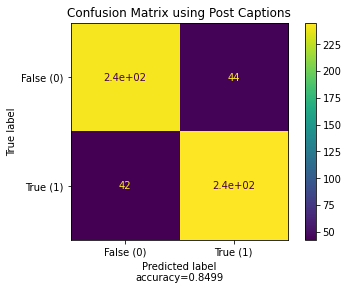

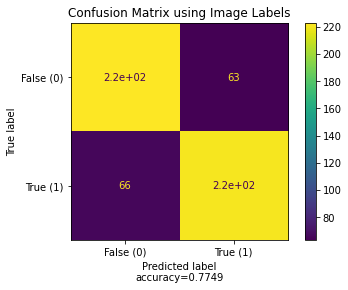

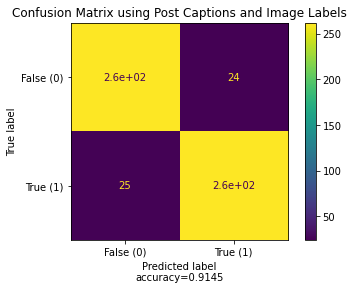

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       286
           1       0.85      0.85      0.85       287

    accuracy                           0.85       573
   macro avg       0.85      0.85      0.85       573
weighted avg       0.85      0.85      0.85       573

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       286
           1       0.78      0.77      0.77       287

    accuracy                           0.77       573
   macro avg       0.77      0.77      0.77       573
weighted avg       0.77      0.77      0.77       573

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       286
           1       0.92      0.91      0.91       287

    accuracy                           0.91       573
   macro avg       0.91      0.91      0.91       573
weighted avg       0.91      0.91      0.91       573



In [ ]:

import pandas as pd 
import nltk
import numpy as np
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from collections import defaultdict
import re
from nltk.corpus import stopwords
from itertools import chain
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from google.colab import files
import io
from google.colab import  drive

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

uploaded = files.upload()

file = pd.read_excel(io.BytesIO(uploaded['labels_final.xlsx']))
zara = pd.read_excel(io.BytesIO(uploaded['zara.xlsx']))

zara = zara[zara['is_video'] == False] 

file['post_shortcode'] = file['shortcode']

mask =file.post_shortcode.isin(zara['post_shortcode'])

file = file[mask]

file['Labels'] = file['Labels'].astype(str)
zara['post_caption'] = zara['post_caption'].astype(str)
file["Labels"] = file["Labels"].str.lower()
zara['post_caption'] = zara['post_caption'].str.lower()
zara = zara[zara['is_video'] == False] 

df_engage = pd.read_excel(io.BytesIO(uploaded['zara_only_pics.xlsx']))
likes_max = df_engage.loc[df_engage['likes'].idxmax(),'likes']
df_engage['likes_norm'] = df_engage['likes']/likes_max

comments_max = df_engage.loc[df_engage['comments'].idxmax(),'comments']
df_engage['comments_norm'] = df_engage['comments']/comments_max

df_engage['Engagement_Score'] = 0.4*df_engage['likes_norm'] + 0.6*df_engage['comments_norm']
median_eng = df_engage['Engagement_Score'].median()
def E_Score(i):
    if i['Engagement_Score']>= median_eng:
        return 1
    else:
        return 0
    
df_engage['Engagement'] = df_engage.apply (lambda i: E_Score(i), axis=1)

engagement = df_engage['Engagement']
stops =set(stopwords.words("english"))
def identify_tokens(row):
    tokens = nltk.word_tokenize(row)
    # taken only words (not punctuation)
    #token_words = [w for w in tokens if w.isalpha() or w.isalnum()]
    token_words = [w for w in tokens if w.isalpha()]
    
    return token_words
file['Labels'] = file['Labels'].apply(identify_tokens)
zara['post_caption'] = zara['post_caption'].apply(identify_tokens)


def remove_stops(row):
    row
    non_stop = [w for w in row if not w in stops]
    return (non_stop)
file['Labels'] = file['Labels'].apply(remove_stops)
zara['processed'] = zara['post_caption'].apply(remove_stops)

def rejoin_words(row):
    row
    joined_words = ( " ".join(row))
    return joined_words
file['processed'] = file['Labels'].apply(rejoin_words)
zara['processed'] = zara['post_caption'].apply(rejoin_words)

vect_word = TfidfVectorizer(analyzer='word',dtype=np.float32)
df_tfidf = vect_word.fit_transform(file['processed'])
tfidf = df_tfidf.toarray()
tfidf_image_labels = pd.DataFrame(tfidf,columns=vect_word.get_feature_names()) 

vect_word = TfidfVectorizer(analyzer='word',dtype=np.float32)
df_tfidf = vect_word.fit_transform(zara['processed'])
tfidf = df_tfidf.toarray()
tfidf_post_captions = pd.DataFrame(tfidf,columns=vect_word.get_feature_names()) 

LR_model = LogisticRegression()
LR_model.fit(tfidf_post_captions, engagement)
predictions_post_captions = LR_model.predict(tfidf_post_captions)
score_pc = LR_model.score(tfidf_post_captions, engagement)


LR_model_il = LogisticRegression()
LR_model_il.fit(tfidf_image_labels, engagement)
predictions_image_label = LR_model_il.predict(tfidf_image_labels)
score_il = LR_model_il.score(tfidf_image_labels, engagement)

combined = pd.concat([tfidf_image_labels, tfidf_post_captions], axis=1)
LR_model_combined = LogisticRegression()
LR_model_combined.fit(combined, engagement)
predictions_combined = LR_model_combined.predict(combined)
score_combined = LR_model_combined.score(combined, engagement)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LR_model, tfidf_post_captions, engagement, display_labels = ['False (0)', 'True (1)']) 
plt.title('Confusion Matrix using Post Captions')
plt.xlabel('Predicted label\naccuracy={:0.4f}'.format(score_pc))
plt.show()


plot_confusion_matrix(LR_model_il, tfidf_image_labels, engagement, display_labels = ['False (0)', 'True (1)']) 
plt.title('Confusion Matrix using Image Labels')
plt.xlabel('Predicted label\naccuracy={:0.4f}'.format(score_il))
plt.show()

plot_confusion_matrix(LR_model_combined, combined, engagement,display_labels = ['False (0)', 'True (1)']) 
plt.title('Confusion Matrix using Post Captions and Image Labels')
plt.xlabel('Predicted label\naccuracy={:0.4f}'.format(score_combined))
plt.show()


print(classification_report(engagement, predictions_post_captions))
print(classification_report(engagement, predictions_image_label))
print(classification_report(engagement, predictions_combined))



What can  we conclude from our analysis of the confusion matrices above?

The accuracy that we get when we use the **post caption** words as the independent is about **0.846**. The accuracy that we get when we use the **image labels** as the independent is about **0.775**. The accuracy we get when the independent variable is **image labels and post caption words** is about **0.918**. Based on this result, we can conclude that the words on the post caption and images on the label are different enough that there isn’t a collinearity problem lowering the accuracy when we combine post captions and image labels. 

It can be concluded from this analysis that if Zara had choose one thing to improve upon, they should focus on **creating engaging post captions** rather than the what is in the images themselves. Although, **improving upon both the image and post captions** will result in **more** customer engagement overall. 




**Task C:** Perform **topic modeling** (LDA) on the image labels. Choose an appropriate number of topics. You may want to start with 4, but adjust the number up or down depending on the word distributions you get. LDA should produce two outputs: (i) A file showing which words load on which topics, and (ii) a file showing topic weights for each image. 

Now take the quartiles with highest and lowest engagement scores. What are the differences in the average topic weights of pictures across the two quartiles (e.g., greater proportion of some topics in highest engagement quartile)? Show the main results in a table. 


In [ ]:
! pip install lda
import os, csv, nltk, lda
import pandas as pd
import numpy as np
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import io
from google.colab import files
import io
from google.colab import  drive

uploaded = files.upload()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

df = pd.read_excel(io.BytesIO(uploaded['labels_final.xlsx']))

Saving labels_final.xlsx to labels_final (4).xlsx
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
ntopics = 5

print("Number of rows with any of the empty columns:")
print(df.isnull().sum().sum())

df = df.dropna(subset=['Labels'])

# Load the regular expression library
import re
# Remove punctuation
df['Labels'] = df['Labels'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['Labels'] = df['Labels'].map(lambda x: x.lower())
# Print out the first rows of papers
df['Labels'].head()

print(df.head())
vec_words = CountVectorizer(stop_words='english')

total_features_words = vec_words.fit_transform(df['Labels'])

print(total_features_words.shape)

model = lda.LDA(n_topics=int(ntopics), n_iter=500,random_state=1)
model.fit(total_features_words)

topic_word = model.topic_word_
doc_topic = model.doc_topic_
doc_topic = pd.DataFrame(doc_topic)
df = df.join(doc_topic, rsuffix = 'topic')
zaraPhoto = pd.DataFrame()

print(df.head())

for i in range(int(ntopics)):
  topic = "topic_"+str(i)
  zaraPhoto[topic]=df.groupby(['shortcode'])[i].mean()

zaraPhoto=zaraPhoto.reset_index()
topics = pd.DataFrame(topic_word)
topics.columns = vec_words.get_feature_names()
topics1=topics.transpose()

print("Topics word distribution written in file topic_word_dist.xlsx")
drive.mount('/drive')
topics1.to_excel('/drive/My Drive/topic_word_dist.xlsx')

print("Text topic distribtuion written in file text_topic_dist.xlsx")
zaraPhoto.to_excel('/drive/My Drive/text_topic_dist.xlsx')

INFO:lda:n_documents: 698
INFO:lda:vocab_size: 658
INFO:lda:n_words: 7431
INFO:lda:n_topics: 5
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -60619
INFO:lda:<10> log likelihood: -43058
INFO:lda:<20> log likelihood: -41094


Number of rows with any of the empty columns:
2
                                           shortcode                                             Labels
0  https://scontent-dfw5-2.cdninstagram.com/v/t51...  clothing fashion outerwear fur street fashion ...
1  https://scontent-dfw5-2.cdninstagram.com/v/t51...  sky darkness room adventure game music venue n...
2  https://scontent-dfw5-2.cdninstagram.com/v/t51...        cool fashion jeans sitting denim shoe style
3  https://scontent-dfw5-2.cdninstagram.com/v/t51...  hair face hairstyle eyebrow forehead chin head...
4  https://scontent-dfw5-2.cdninstagram.com/v/t51...  snapshot standing hand arm human photography s...
(698, 658)


INFO:lda:<30> log likelihood: -40411
INFO:lda:<40> log likelihood: -40090
INFO:lda:<50> log likelihood: -39919
INFO:lda:<60> log likelihood: -39803
INFO:lda:<70> log likelihood: -39857
INFO:lda:<80> log likelihood: -39609
INFO:lda:<90> log likelihood: -39557
INFO:lda:<100> log likelihood: -39595
INFO:lda:<110> log likelihood: -39577
INFO:lda:<120> log likelihood: -39424
INFO:lda:<130> log likelihood: -39526
INFO:lda:<140> log likelihood: -39509
INFO:lda:<150> log likelihood: -39400
INFO:lda:<160> log likelihood: -39385
INFO:lda:<170> log likelihood: -39456
INFO:lda:<180> log likelihood: -39450
INFO:lda:<190> log likelihood: -39467
INFO:lda:<200> log likelihood: -39423
INFO:lda:<210> log likelihood: -39343
INFO:lda:<220> log likelihood: -39428
INFO:lda:<230> log likelihood: -39419
INFO:lda:<240> log likelihood: -39439
INFO:lda:<250> log likelihood: -39381
INFO:lda:<260> log likelihood: -39439
INFO:lda:<270> log likelihood: -39359
INFO:lda:<280> log likelihood: -39436
INFO:lda:<290> log 

                                           shortcode  ...         4
0  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...  0.008000
1  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...  0.525926
2  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...  0.013333
3  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...  0.009524
4  https://scontent-dfw5-2.cdninstagram.com/v/t51...  ...  0.095652

[5 rows x 7 columns]
Topics word distribution written in file topic_word_dist.xlsx
Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Text topic distribtuion written in file text_topic_dist.xlsx


We ran  topic modeling with 3, 4, and 5 topics to see which made the most sense to make sure our topics are as Mutually Exclusive/Collectively Exhaustive as possible. 

With three topics, we labeled our topics as "Human", "Black & White", and "Fashion." However, words like "Fashion" were still high weight in all three topics. 

With four topics, we saw the fashion topic split into 2 categories which were best described based on color as more "brighter, feminine fashion" and darker, more formal "masculine fashion" along with the two other categories "B&W" and "Human."

However, we saw the **best result** with 5 topics. The topic names are described below.

From our analysis of the Excel file for topic keywords, we labeled this topics as follows:

**Topic 0:** Footwear and Accessories

**Topic 1:** Clothing

**Topic 2:** Black & White

**Topic 3:** Human & Headshots

**Topic 4:** Interaction, Life, and Connection



In [ ]:
merged = pd.merge(zaraPhoto, engagement_score, left_on ="index", right_on = "post_shortcode")
print(merged.head())

q1 = merged['Engagement_Score'].quantile(0.25)
q4 = merged['Engagement_Score'].quantile(0.75)

print("Q1: ",q1)
print("Q4: ",q4, '\n')

lowest_engagement = merged.iloc[:,[1,2,3,4,5,7]][merged['Engagement_Score'] <= q1]
highest_engagement = merged.iloc[:,[1,2,3,4,5,7]][merged['Engagement_Score'] >= q4]

overall_topics = merged.iloc[:,[1,2,3,4,5,7]]
overall_topics.head()

#print("Overall:\n",overall_topics.mean(axis=0))
#print("\nLowest Engagement:\n",lowest_engagement.mean(axis=0))
#print("\nHighest Engagement:\n",highest_engagement.mean(axis=0))
index_list = ['topic_0','topic_1','topic_2','topic_3','topic_4']
topic_list = ['footwear & accessories','clothing','black & white','human & headshots','interaction, life, connection']
labels= pd.Series(data = topic_list ,index = index_list, name = "Topic Labels")

overall = pd.Series(overall_topics.mean(axis=0), name = "Overall")
lowest = pd.Series(lowest_engagement.mean(axis=0),  name = "Lowest Engagement Q1")
highest = pd.Series(highest_engagement.mean(axis=0),  name = "Highest Engagement Q4")
table = pd.merge(labels, overall, left_index=True, right_index=True)
table = pd.merge(table, lowest, left_index=True, right_index=True)
table = pd.merge(table, highest, left_index=True, right_index=True)

table

                                               index  ...  Engagement_High_Low
0  https://scontent-dfw5-1.cdninstagram.com/v/t51...  ...                    1
1  https://scontent-dfw5-1.cdninstagram.com/v/t51...  ...                    1
2  https://scontent-dfw5-1.cdninstagram.com/v/t51...  ...                    1
3  https://scontent-dfw5-1.cdninstagram.com/v/t51...  ...                    0
4  https://scontent-dfw5-1.cdninstagram.com/v/t51...  ...                    0

[5 rows x 9 columns]
Q1:  0.09559832465928256
Q4:  0.19700949091207287 



,Topic Labels,Overall,Lowest Engagement Q1,Highest Engagement Q4
topic_0,footwear & accessories,0.162749,0.164152,0.147624
topic_1,clothing,0.300362,0.268391,0.296514
topic_2,black & white,0.188237,0.200973,0.173240
topic_3,human & headshots,0.189362,0.162972,0.254667
topic_4,"interaction, life, connection",0.159290,0.203512,0.127954


The difference between the topic labels for the lowest engagement quartiles and the highest engagement quartiles are shown  above, along with overall percentages.

Highest engagement photos show (1) LESS footwear & accessories, (2) average amount of clothing, (3) LESS black and white photography, (4) MUCH MORE human & headshots, and (5) less interaction/lifestyle photos. 

On the other hand, lowest engagement photos tend to have less clothing, less human/headshots, and instead more black & white lifestyle photography.

**Task D:** What advice would you give Zara if it wants to increase engagement on its Instagram page based on your findings in Tasks B and C?

1. Based on findings in Task B, here is our advice:

    a. **Captions and Photos are both important.** From our analysis of what features best predict high engagement photos,  both the imaage labels and the captions added value to determining engagement. Neither can be disregarded.

    b.  **Captions should continue to *add more* to the photo.** Captions add the most to engagement when they say more than simply describing the photo. Use the caption to be witty, add value, or ask a question to your audience to increase engagement. 

    c. **Captions appear to  be slightly more important than the image itself.** While the image is the first thing viewers see, our model showed captions have slightly more predicive power than the image lables. The most successful images will have a curated caption just as well-thought-out as the image itself. 

2. Based on findings in  Task C, here is our advice:

    a. **Human close-ups and headshots are the most successful engagement topics.** A model close-up shot is the highest determinant of Zara's success. Having a center "star" model as the sole focus of the photo is more often present in high engagement photos.

    b.  **Minmize the amount of black & white lifestyle photography.** Lower engagement posts are more likely to be black & white lifestyle photos. While these may be interesting, they do not do a great job of catching people's eyes in their news feed and should be avoided. 

    c. **Clothing and fashion should still be included in photos -- after all, that's the product you want people to purchase.** High engagement photos still included fashion and clothing as a significant topic. As Zara is a fashion company, make sure the posts continue to pair a solo model with eye-catching fashion to increase engagement. 